# Import Library <a name="import-library"></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for visualization
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
# machine learning library
from sklearn.model_selection import train_test_split  # => split data to train & test
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

2025-09-21 20:16:37.482447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758485797.716989      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758485797.788888      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/diabetes-health-indicators-dataset/diabetes_dataset.csv


# EDA Utility Functions (Python + Pandas) <a name="eda-utility-functions"></a>
## 1. eda_summary() <a name="eda-summary"></a>
This function performs basic exploratory data analysis (EDA) steps and prints the results directly.

### Features:
- 📥 Reads data from a CSV file or accepts an existing DataFrame
- 👀 Displays the first 5 rows
- ❓ Shows missing values (count)
- 📑 Shows number of duplicated rows
- 📐 Prints the dataset shape (rows, columns)
- 📊 Provides descriptive statistics (.describe())
- ℹ️ Shows data info (.info()) to distinguish categorical/numerical columns
- 📉 Calculates and displays percentage of NULL values per column

In [2]:
def eda_summary(filepath=None, df=None):
    """
    Function to perform basic EDA steps:
    - Read CSV (if filepath provided)
    - Show head of data
    - Show missing values
    - Show duplicated values
    - Show shape
    - Describe data
    - Show info (numerical/categorical)
    - Show NULL percentage per column
    """
    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")
    print("\n--- First 5 Rows ---")
    display(df.head())
    print("\n--- Missing Values ---")
    print(df.isnull().sum())
    print("\n--- Duplicated Rows ---")
    print(df.duplicated().sum())
    print("\n--- Shape ---")
    print(df.shape)
    print("\n--- Description ---")
    display(df.describe(include='all'))
    print("\n--- Data Info ---")
    df.info()
    print("\n--- NULL Percentage ---")
    data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
    display(data_null.to_frame(name='Percent NULL data (%)'))
    return df

# Read file from function
df = eda_summary(filepath="/kaggle/input/diabetes-health-indicators-dataset/diabetes_dataset.csv")


--- First 5 Rows ---


age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]


--- Missing Values ---
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting 

age  gender ethnicity education_level income_level  \
count   100000.00000  100000    100000          100000       100000   
unique           NaN       3         5               4            5   
top              NaN  Female     White      Highschool       Middle   
freq             NaN   50216     44997           44891        35152   
mean        50.12041     NaN       NaN             NaN          NaN   
std         15.60460     NaN       NaN             NaN          NaN   
min         18.00000     NaN       NaN             NaN          NaN   
25%         39.00000     NaN       NaN             NaN          NaN   
50%         50.00000     NaN       NaN             NaN          NaN   
75%         61.00000     NaN       NaN             NaN          NaN   
max         90.00000     NaN       NaN             NaN          NaN   

       employment_status smoking_status  alcohol_consumption_per_week  \
count             100000         100000                 100000.000000   
unique                 4              3                           NaN   
top             Employed          Never                           NaN   
freq               60175          59813                           NaN   
mean                 NaN            NaN                      2.003670   
std                  NaN            NaN                      1.417779   
min                  NaN            NaN                      0.000000   
25%                  NaN            NaN                      1.000000   
50%                  NaN            NaN                      2.000000   
75%                  NaN            NaN                      3.000000   
max                  NaN            NaN                     10.000000   

        physical_activity_minutes_per_week     diet_score  ...  \
count                        100000.000000  100000.000000  ...   
unique                                 NaN            NaN  ...   
top                                    NaN            NaN  ...   
freq                                   NaN            NaN  ...   
mean                            118.911640       5.994787  ...   
std                              84.409662       1.780954  ...   
min                               0.000000       0.000000  ...   
25%                              57.000000       4.800000  ...   
50%                             100.000000       6.000000  ...   
75%                             160.000000       7.200000  ...   
max                             833.000000      10.000000  ...   

        hdl_cholesterol  ldl_cholesterol  triglycerides  glucose_fasting  \
count     100000.000000    100000.000000  100000.000000     100000.00000   
unique              NaN              NaN            NaN              NaN   
top                 NaN              NaN            NaN              NaN   
freq                NaN              NaN            NaN              NaN   
mean          54.042790       103.000430     121.462650        111.11712   
std           10.267374        33.390256      43.372619         13.59561   
min           20.000000        50.000000      30.000000         60.00000   
25%           47.000000        78.000000      91.000000        102.00000   
50%           54.000000       102.000000     121.000000        111.00000   
75%           61.000000       126.000000     151.000000        120.00000   
max           98.000000       263.000000     344.000000        172.00000   

        glucose_postprandial  insulin_level          hba1c  \
count          100000.000000  100000.000000  100000.000000   
unique                   NaN            NaN            NaN   
top                      NaN            NaN            NaN   
freq                     NaN            NaN            NaN   
mean              160.035050       9.061242       6.520776   
std                30.935472       4.954060       0.813921   
min                70.000000       2.000000       4.000000   
25%               139.000000       5.090000       5.970000   
50%               160.0


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_t

Percent NULL data (%)
age                                                   0.0
gender                                                0.0
ethnicity                                             0.0
education_level                                       0.0
income_level                                          0.0
employment_status                                     0.0
smoking_status                                        0.0
alcohol_consumption_per_week                          0.0
physical_activity_minutes_per_week                    0.0
diet_score                                            0.0
sleep_hours_per_day                                   0.0
screen_time_hours_per_day                             0.0
family_history_diabetes                               0.0
hypertension_history                                  0.0
cardiovascular_history                                0.0
bmi                                                   0.0
waist_to_hip_ratio                                    0.0
systolic_bp                                           0.0
diastolic_bp                                          0.0
heart_rate                                            0.0
cholesterol_total                                     0.0
hdl_cholesterol                                       0.0
ldl_cholesterol                                       0.0
triglycerides                                         0.0
glucose_fasting                                       0.0
glucose_postprandial                                  0.0
insulin_level                                         0.0
hba1c                                                 0.0
diabetes_risk_score                                   0.0
diabetes_stage                                        0.0
diagnosed_diabetes                                    0.0

## 2. eda_report()  <a name="eda-report"></a>
This function creates a clean summary report in a DataFrame format instead of printing.

### Features:
- 📥 Reads data from a CSV file or accepts an existing DataFrame
- 📊 For each column, it shows:

1. Data type
2. Missing values (count)
3. Missing %
4. Unique values count
5. Column type (Numeric / Categorical / Other)

-  ➕ Adds a final row summarizing the total duplicated rows

In [3]:
def eda_report(filepath=None, df=None):
    """
    Generate an EDA summary report for a dataset:
    - Missing values (count & %)
    - Duplicated rows (overall count)
    - Column data types
    - Unique values count
    """
    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")
    report = pd.DataFrame({
        "Data Type": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Missing %": round(df.isnull().sum() / len(df) * 100, 2),
        "Unique Values": df.nunique()
    })
    report["Column Type"] = report["Data Type"].apply(
        lambda x: "Numeric" if pd.api.types.is_numeric_dtype(x)
        else "Categorical" if pd.api.types.is_string_dtype(x)
        else "Other"
    )
    duplicates = df.duplicated().sum()
    summary_row = pd.DataFrame({
        "Data Type": ["-"],
        "Missing Values": ["-"],
        "Missing %": ["-"],
        "Unique Values": ["-"],
        "Column Type": ["-"]
    }, index=["Duplicated Rows = " + str(duplicates)])
    report = pd.concat([report, summary_row])
    return report

# Call function
eda_report(filepath="/kaggle/input/diabetes-health-indicators-dataset/diabetes_dataset.csv") 

Data Type Missing Values Missing %  \
age                                    int64              0       0.0   
gender                                object              0       0.0   
ethnicity                             object              0       0.0   
education_level                       object              0       0.0   
income_level                          object              0       0.0   
employment_status                     object              0       0.0   
smoking_status                        object              0       0.0   
alcohol_consumption_per_week           int64              0       0.0   
physical_activity_minutes_per_week     int64              0       0.0   
diet_score                           float64              0       0.0   
sleep_hours_per_day                  float64              0       0.0   
screen_time_hours_per_day            float64              0       0.0   
family_history_diabetes                int64              0       0.0   
hypertension_history                   int64              0       0.0   
cardiovascular_history                 int64              0       0.0   
bmi                                  float64              0       0.0   
waist_to_hip_ratio                   float64              0       0.0   
systolic_bp                            int64              0       0.0   
diastolic_bp                           int64              0       0.0   
heart_rate                             int64              0       0.0   
cholesterol_total                      int64              0       0.0   
hdl_cholesterol                        int64              0       0.0   
ldl_cholesterol                        int64              0       0.0   
triglycerides                          int64              0       0.0   
glucose_fasting                        int64              0       0.0   
glucose_postprandial                   int64              0       0.0   
insulin_level                        float64              0       0.0   
hba1c                                float64              0       0.0   
diabetes_risk_score                  float64              0       0.0   
diabetes_stage                        object              0       0.0   
diagnosed_diabetes                     int64              0       0.0   
Duplicated Rows = 0                        -              -         -   

                                   Unique Values  Column Type  
age                                           73      Numeric  
gender                                         3  Categorical  
ethnicity                                      5  Categorical  
education_level                                4  Categorical  
income_level                                   5  Categorical  
employment_status                              4  Categorical  
smoking_status                                 3  Categorical  
alcohol_consumption_per_week                  11      Numeric  
physical_activity_minutes_per_week           620      Numeric  
diet_score                                   101      Numeric  
sleep_hours_per_day                           71      Numeric  
screen_time_hours_per_day                    156      Numeric  
family_history_diabetes                        2      Numeric  
hypertension_history                           2      Numeric  
cardiovascular_history                         2      Numeric  
bmi                                          240      Numeric  
waist_to_hip_ratio                            40      Numeric  
systolic_bp                                   86      Numeric  
diastolic_bp                                  60      Numeric  
heart_rate                                    64      Numeric  
cholesterol_total                            210      Numeric  
hdl_cholesterol                               79      Numeric  
ldl_cholesterol                              190      Numeric  
triglycerides                                262      Numeric  
glucose_fasting          

## 3. eda_visuals()  <a name="eda-visuals"></a>
This function generates exploratory data analysis visualizations for both numerical and categorical features.

### Features:

* 📦 Boxplots (Outlier Detection): Creates boxplots for all numerical columns to help identify outliers.
* 📈 Distributions (Histograms + KDE): Plots histograms with Kernel Density Estimation (KDE) for numerical columns.
* 🥧 Pie Charts (Categorical Features): Generates pie charts for categorical columns to show proportions.
* 🔥 Correlation Heatmap: Displays correlation heatmap (Spearman by default, can use Pearson or Kendall).


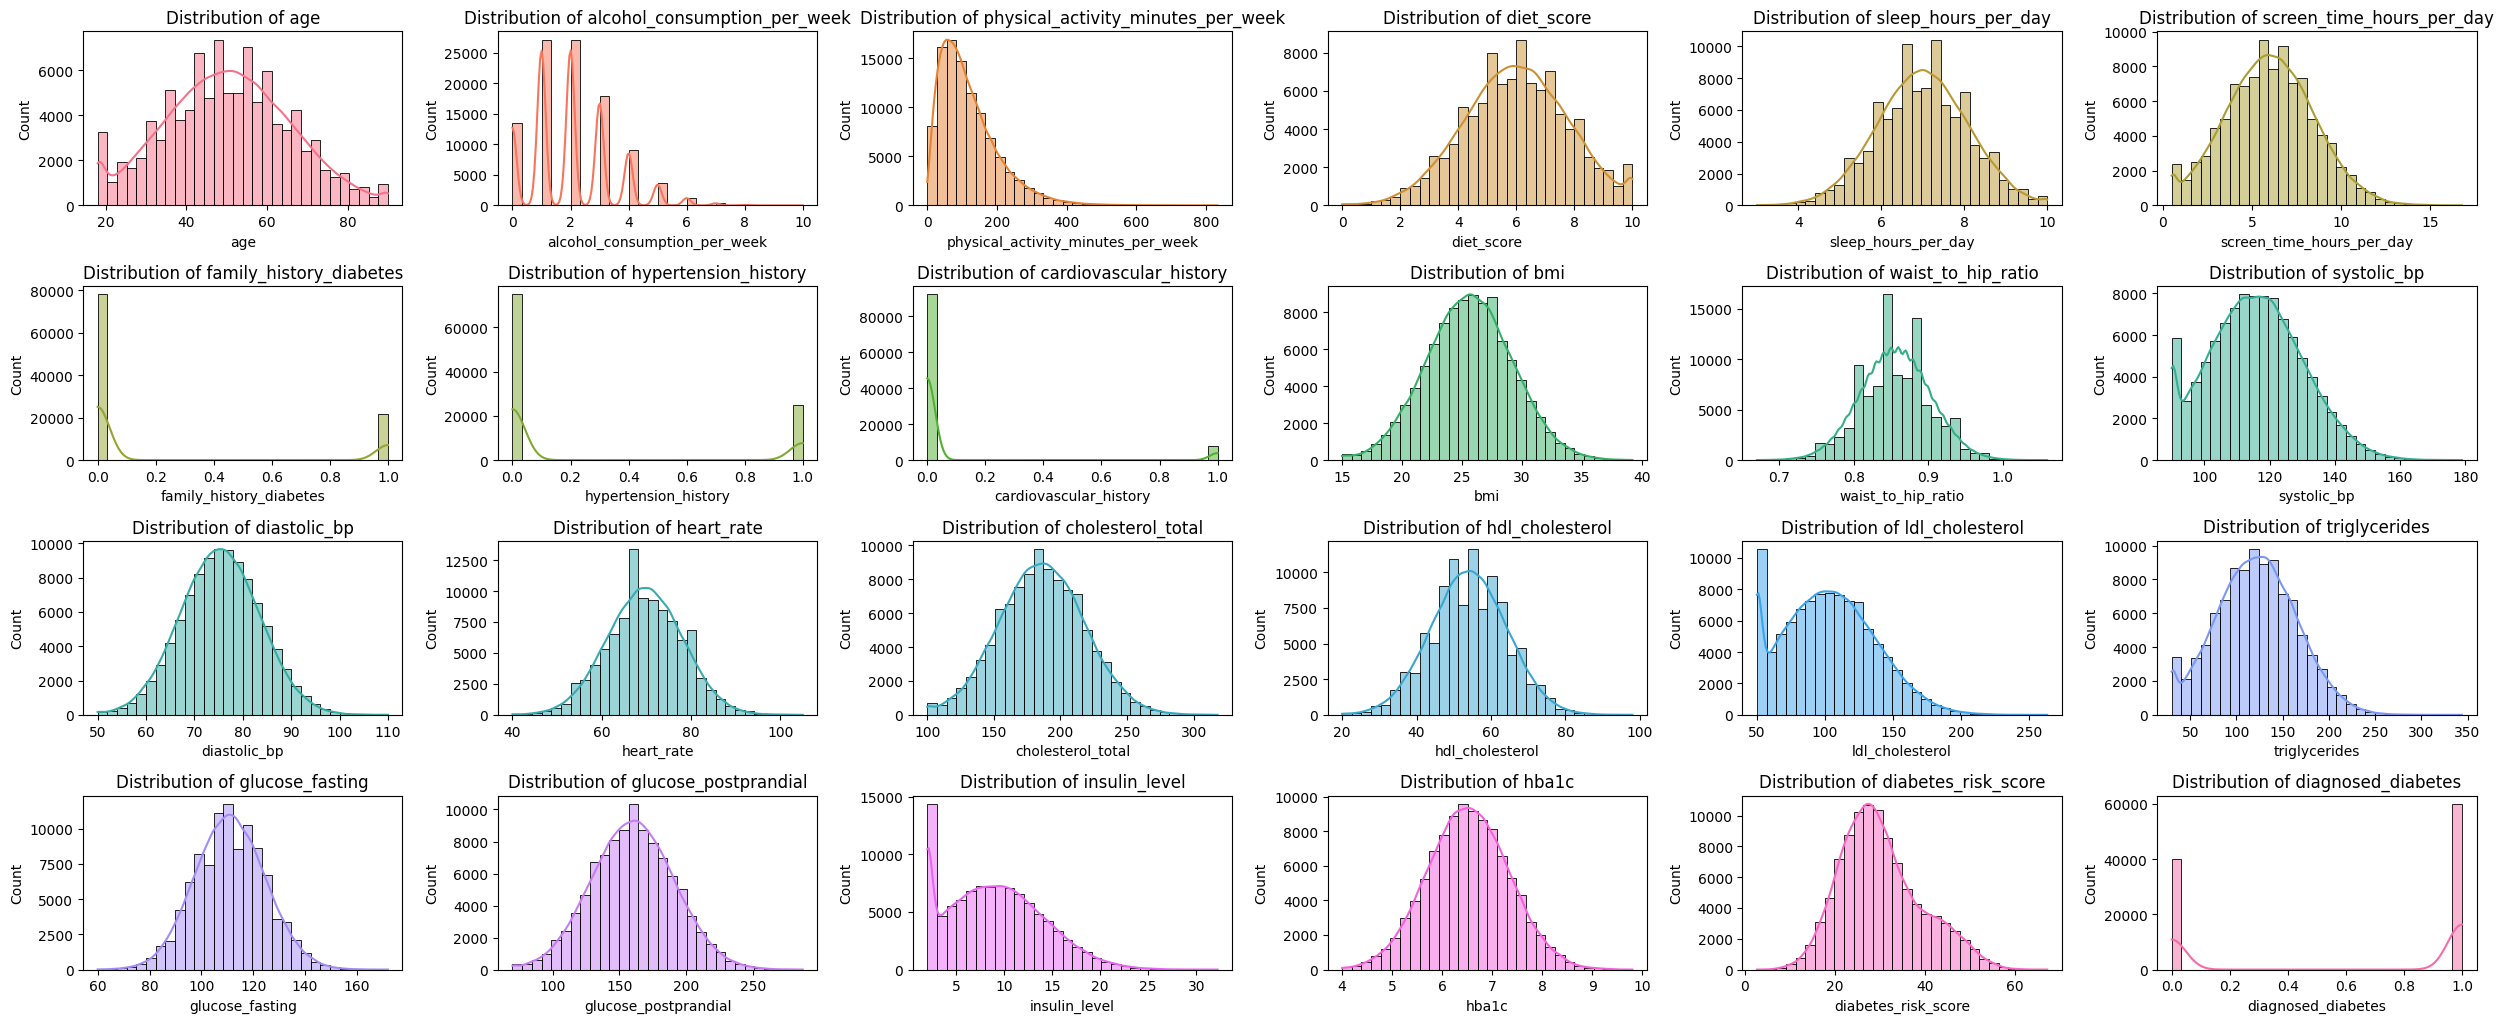

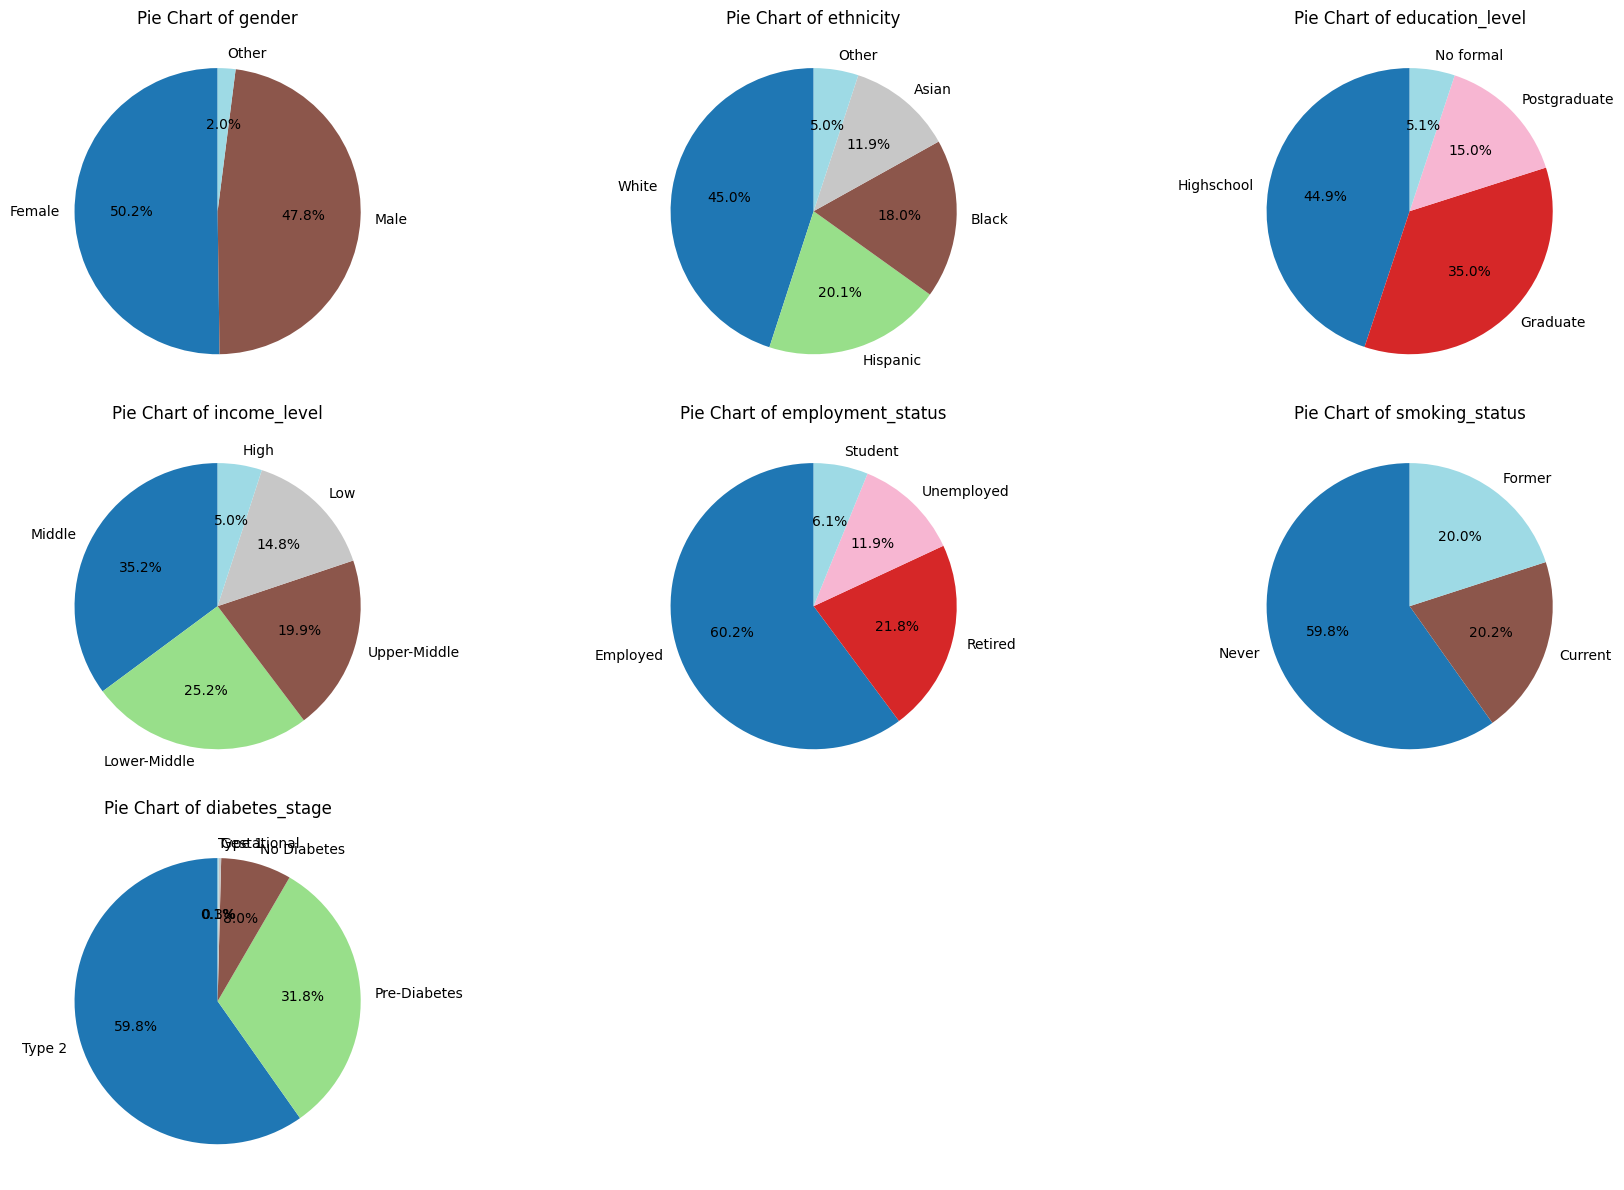

In [4]:
def eda_visuals(df, corr_method='spearman'):
    """
    Generate visualization plots for EDA:
    - Boxplots for numerical columns (outlier detection)
    - Distributions (histograms with KDE) for numerical columns
    - Pie charts for categorical columns
    - Correlation heatmap (default = Spearman)
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    palette = sns.color_palette("husl", len(numerical_cols))
    # Boxplots
    plt.figure(figsize=(25, 18))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.boxplot(y=df[col], color=palette[i-1])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
    # Distributions
    plt.figure(figsize=(25, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    # Pie Charts
    if len(categorical_cols) > 0:
        plt.figure(figsize=(18, 12))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(3, 3, i)
            df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
            plt.title(f'Pie Chart of {col}')
            plt.ylabel('')
        plt.tight_layout()
        plt.show()

# Call function
eda_visuals(df)

## 4. eda_relationships() <a name="eda-relationships"></a>
This function explores deeper relationships between features.

### Features:


* Correlation heatmap for numeric features
* Countplots for categorical vs target
* Boxplots for numeric vs target
* Pairplot for selected features
* Dark theme is applied for better visual comfort.

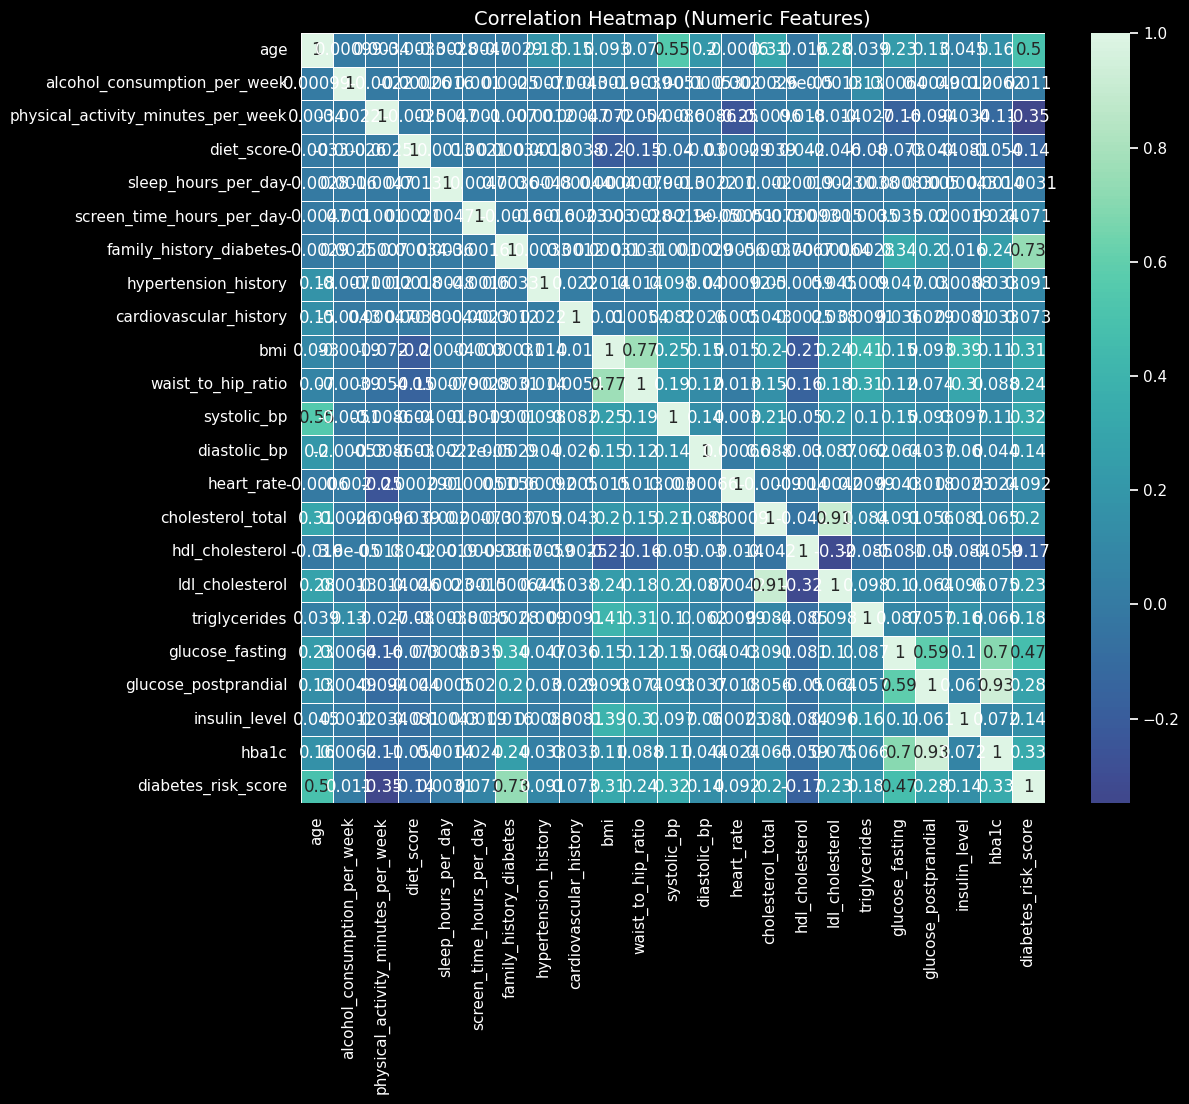

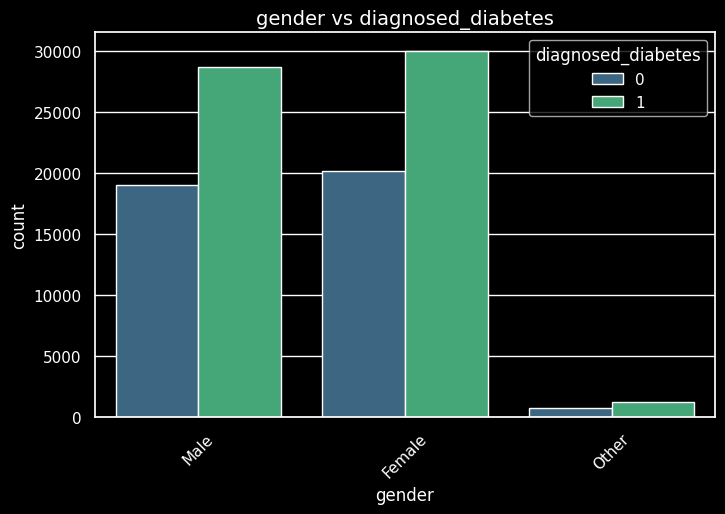

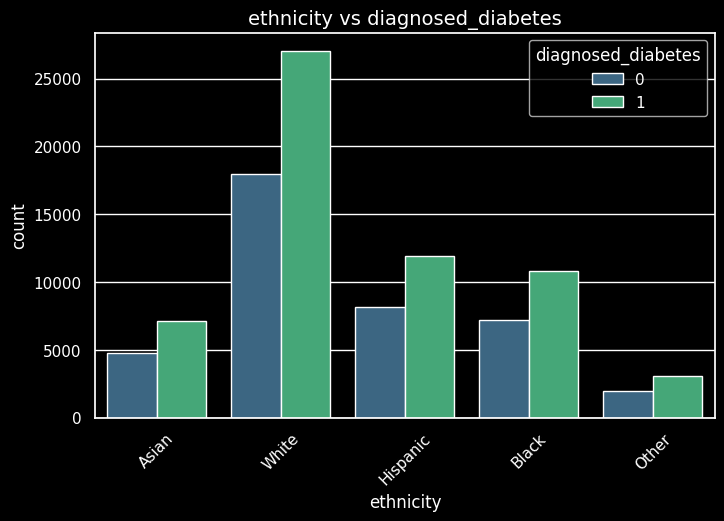

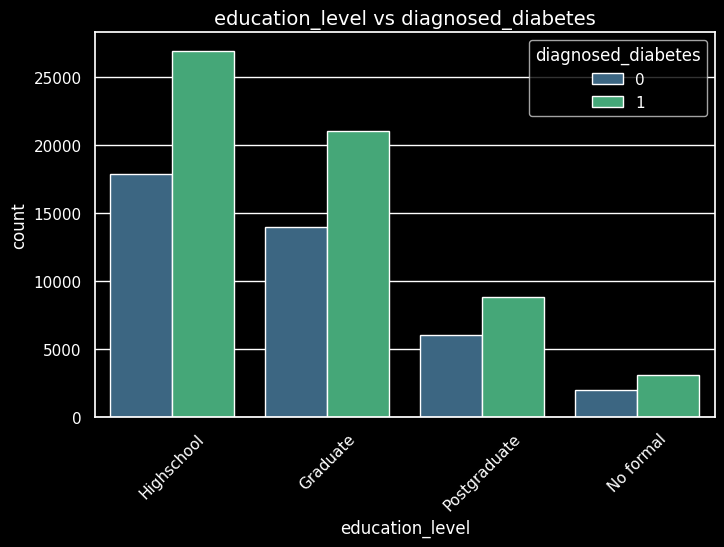

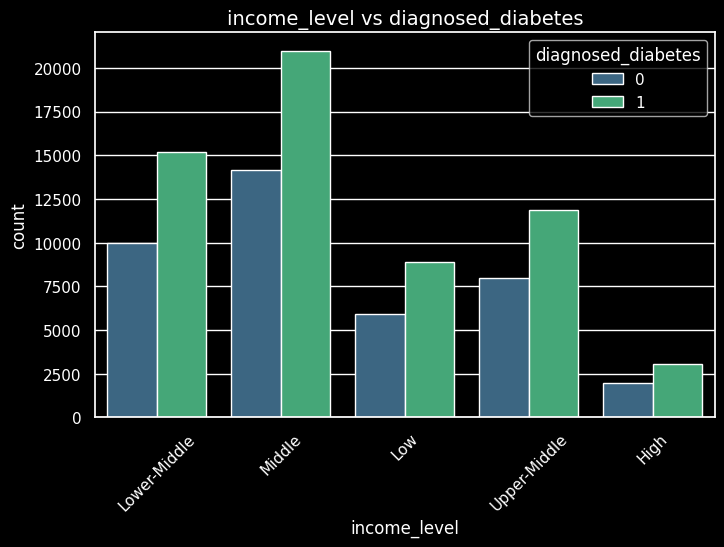

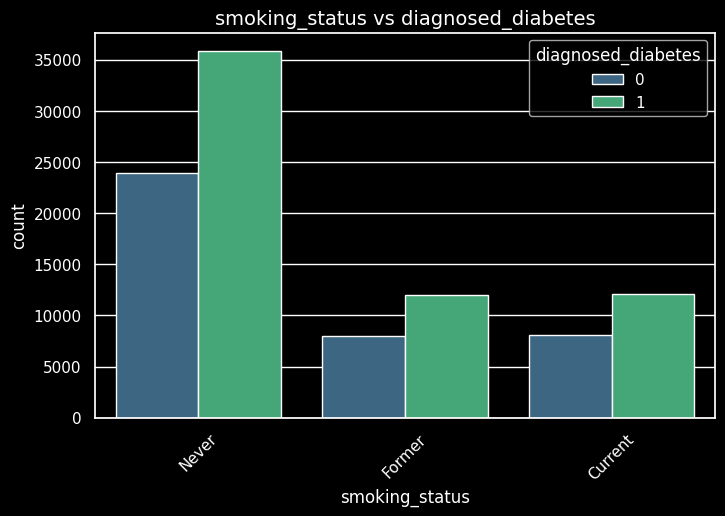

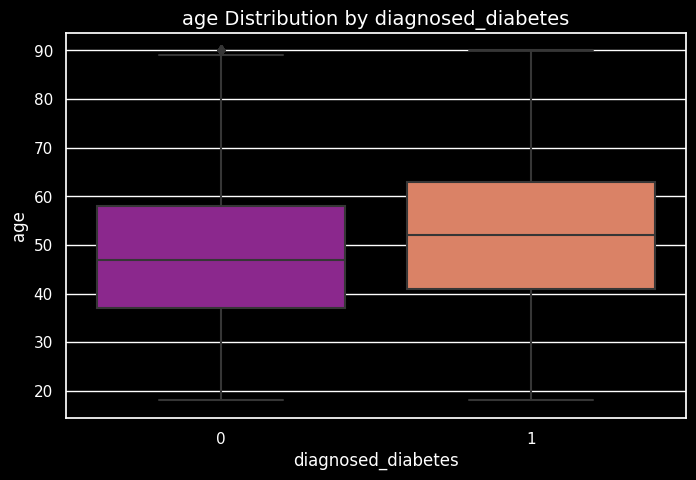

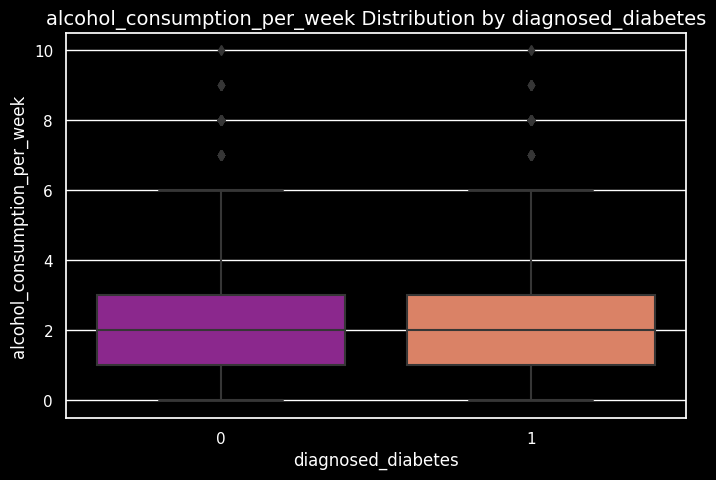

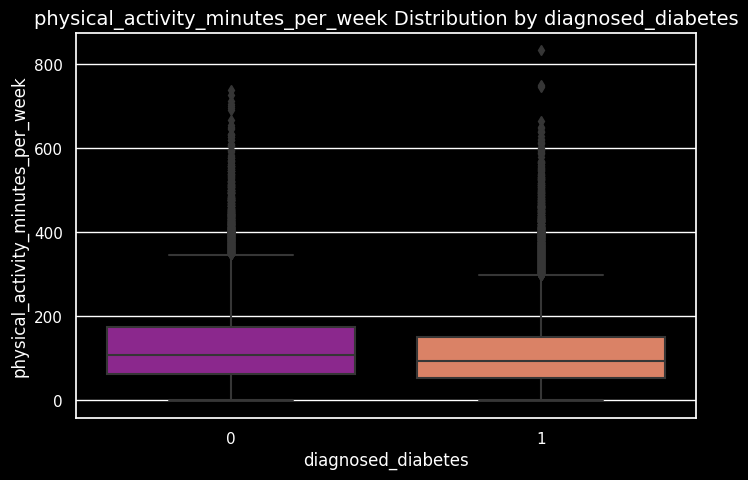

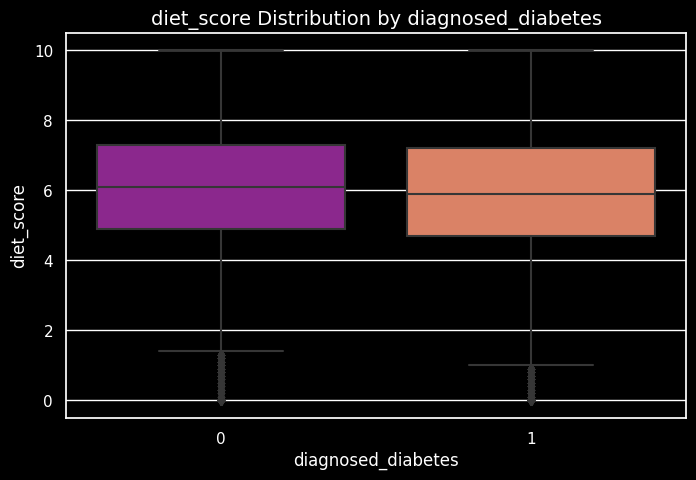

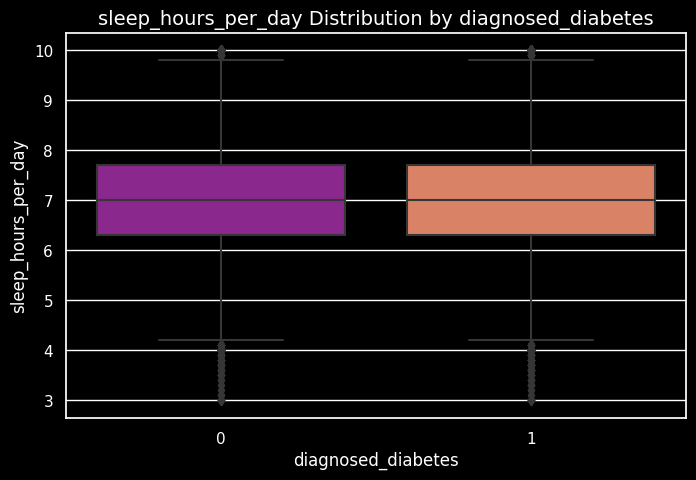

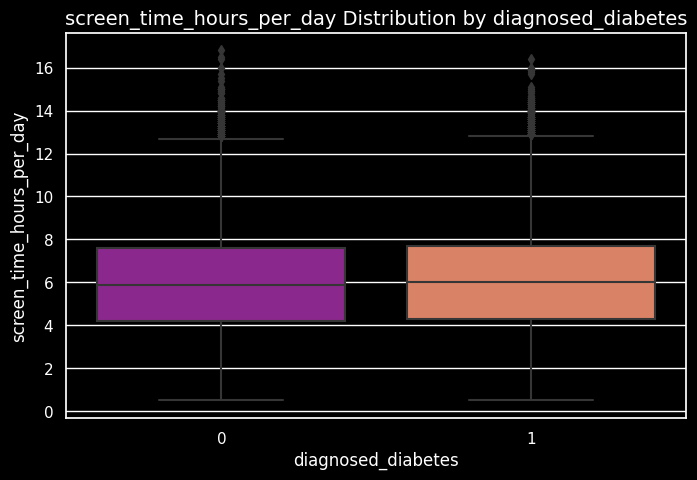

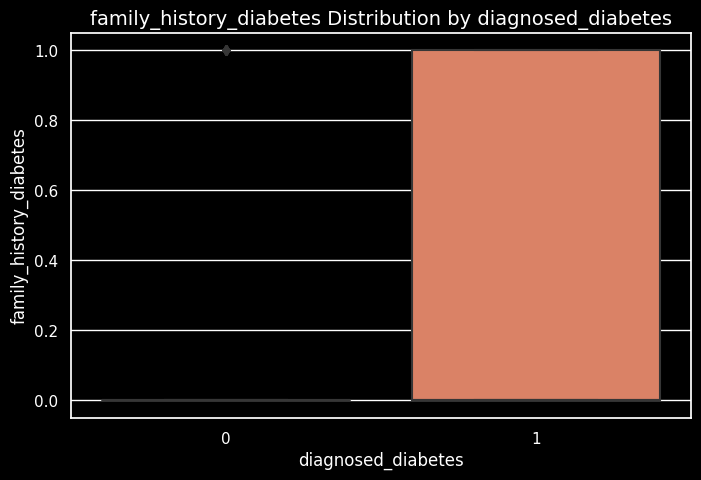

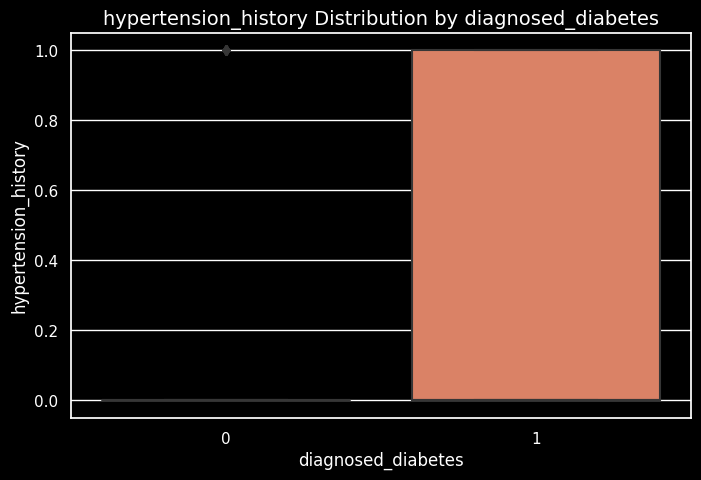

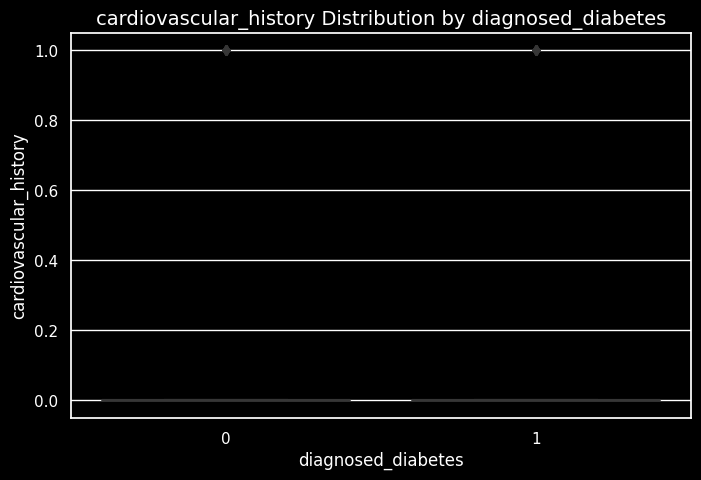

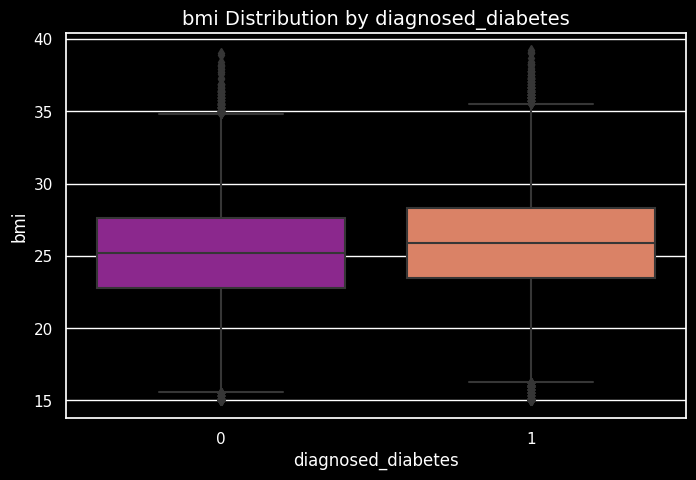

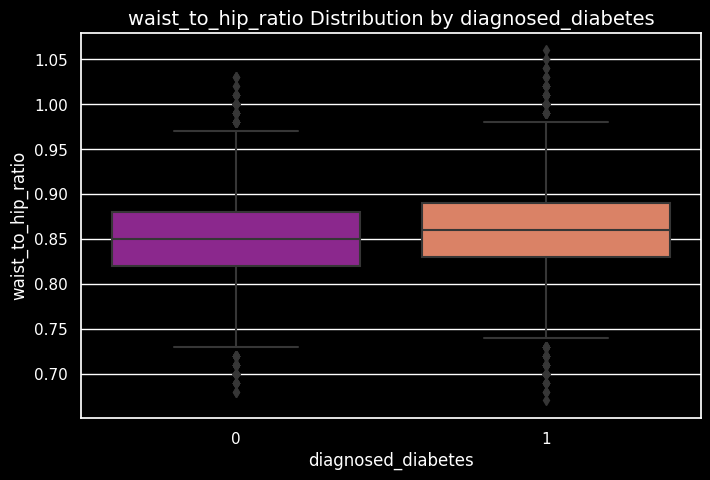

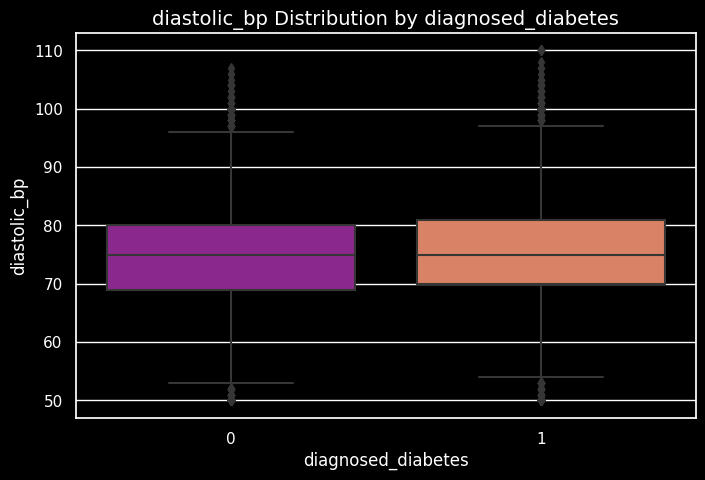

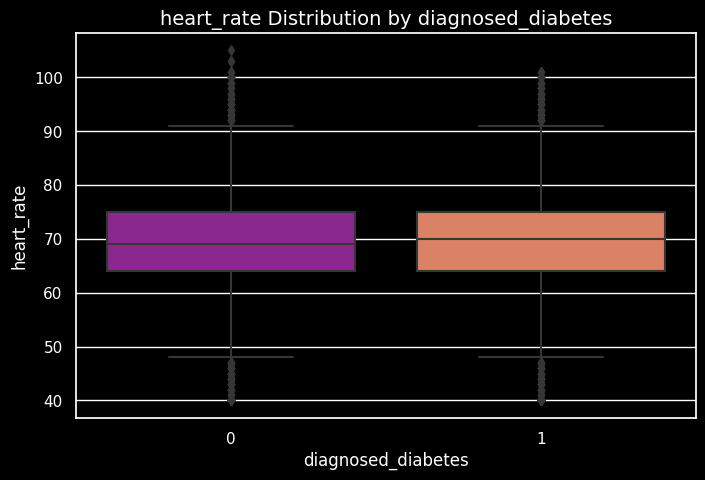

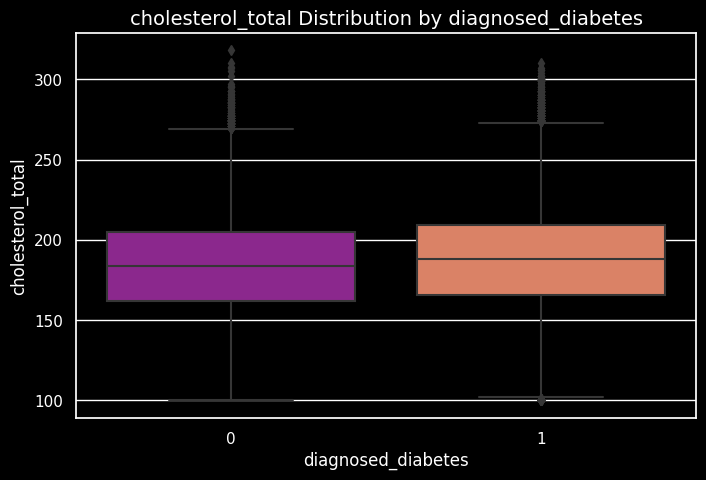

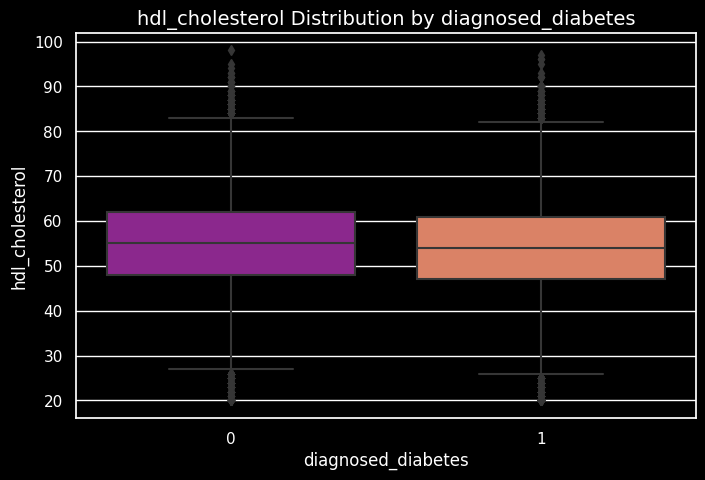

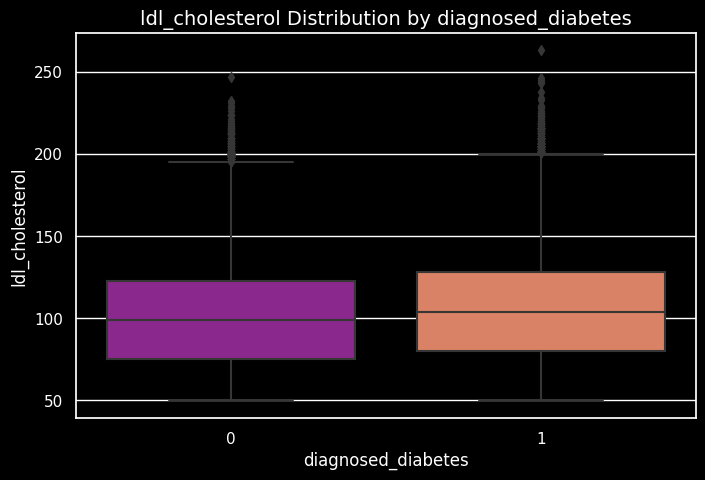

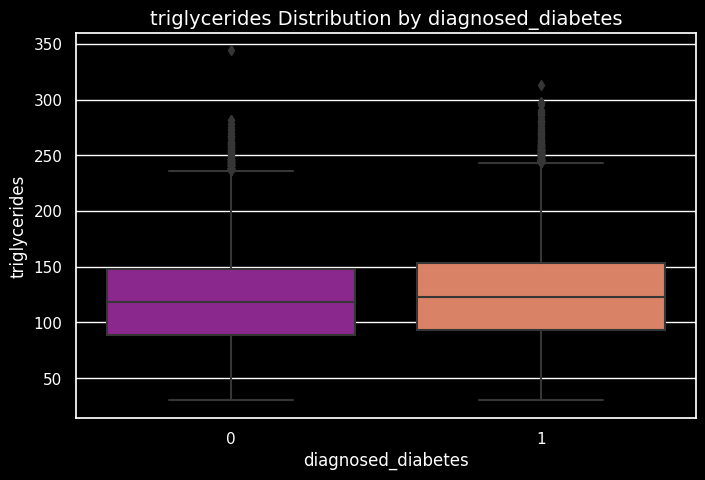

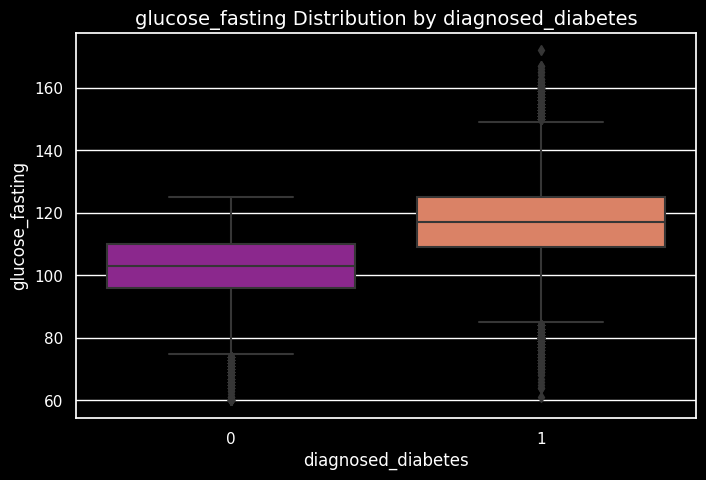

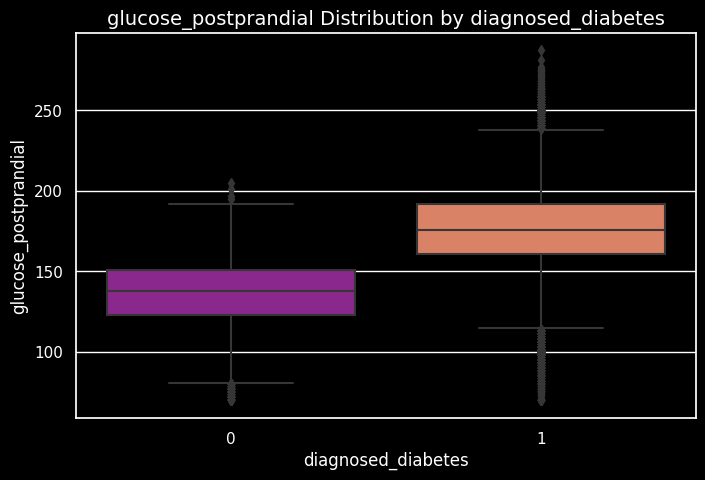

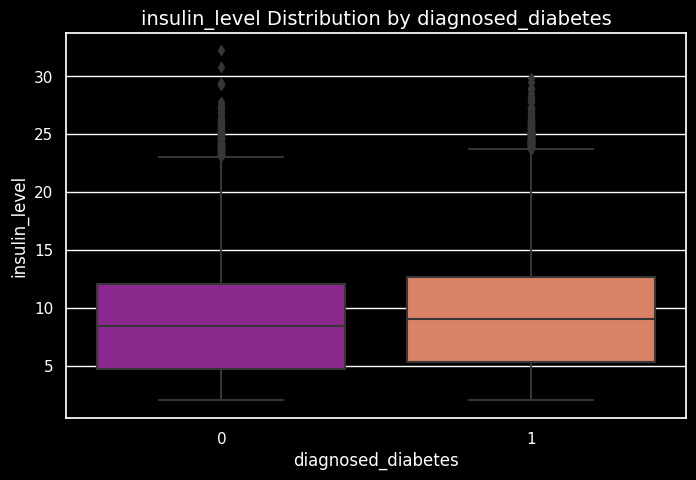

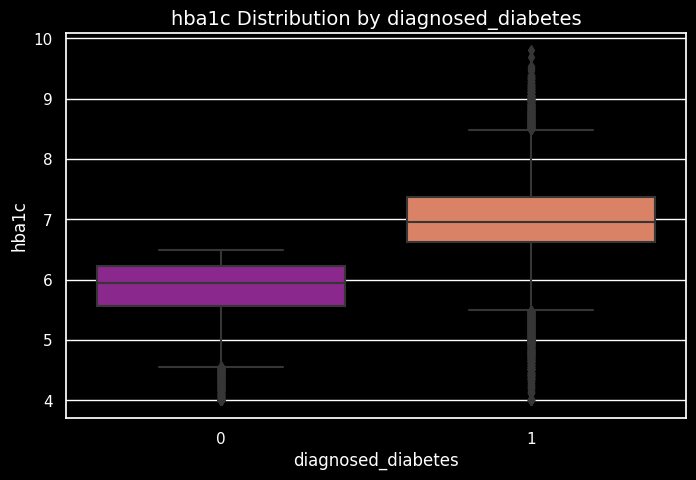

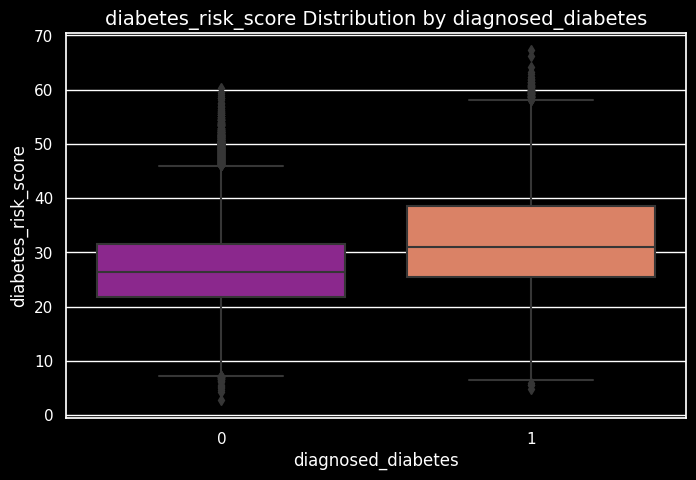

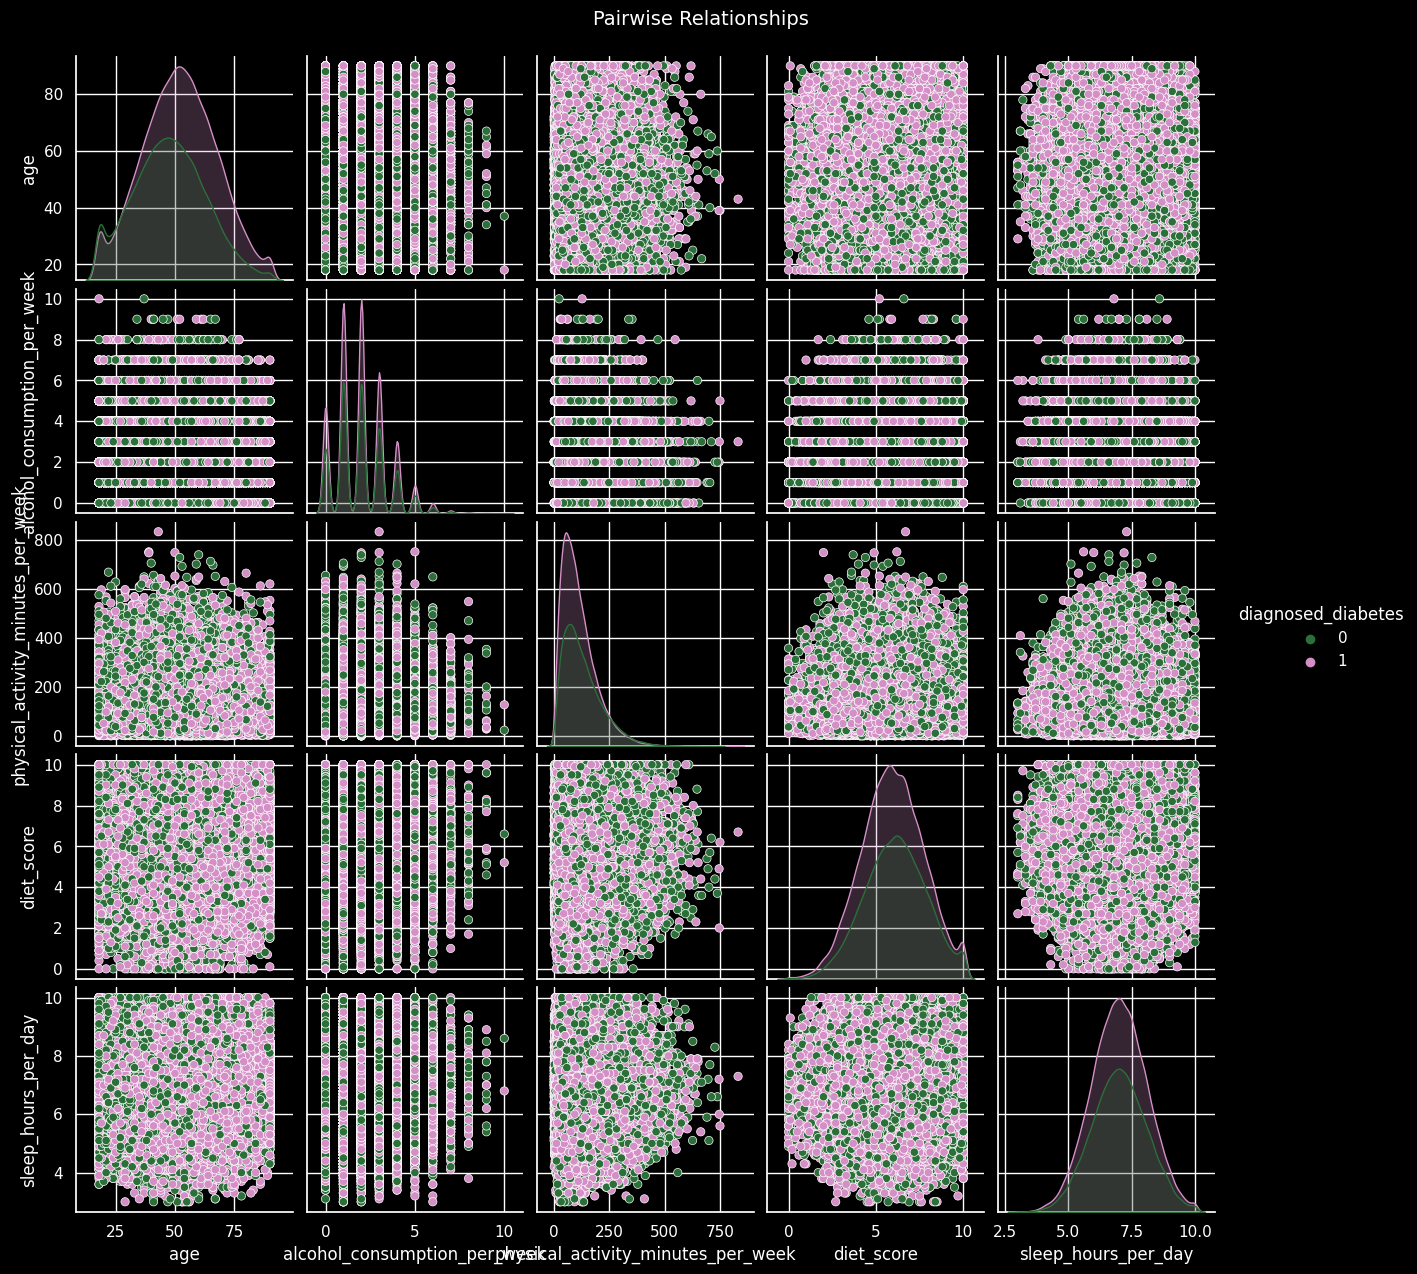

In [5]:
def eda_relationships(df, target_col="diagnosed_diabetes"):
    """
    Explore deeper relationships between features:
    - Correlation heatmap for numeric features
    - Countplots for categorical vs target
    - Boxplots for numeric vs target
    - Pairplot for selected features
    """
    sns.set_theme(style="darkgrid", palette="dark")
    plt.style.use("dark_background")
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target_col, errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop([target_col, "diabetes_stage"], errors="ignore")
    # Correlation Heatmap
    plt.figure(figsize=(12, 10))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()
    # Categorical vs Target
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=45)
        plt.show()
    # Numeric vs Target
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()
    # Pairplot
    selected_features = list(numeric_cols[:5]) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

# Call function
eda_relationships(df, target_col="diagnosed_diabetes")

## 5. eda_stats_tests_viz() <a name="eda-stats_tests_viz"></a>
This function performs statistical tests and visualizes significance.

### Features:

* Chi-square test for categorical vs target
* T-test / Mann-Whitney U test for numerical vs target
* Returns a DataFrame with p-values
* Generates barplot showing p-values for all features

In [6]:
def eda_stats_tests_viz(df, target_col="diagnosed_diabetes"):
    """
    Perform statistical tests and visualize significance:
    - Chi-square test for categorical vs target
    - T-test / Mann-Whitney U test for numeric vs target
    """
    results = []
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target_col, errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop([target_col, "diabetes_stage"], errors="ignore")
    # Chi-Square Test
    for col in categorical_cols:
        contingency = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({"Feature": col, "Test": "Chi-square", "p-value": p, "Significant": "Yes ✅" if p < 0.05 else "No ❌"})
    # T-Test or Mann-Whitney
    for col in numeric_cols:
        groups = df.groupby(target_col)[col].apply(list)
        if len(groups) == 2:
            group1, group2 = groups.iloc[0], groups.iloc[1]
            try:
                stat, p = ttest_ind(group1, group2, nan_policy="omit")
                test_used = "T-test"
            except:
                stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
                test_used = "Mann-Whitney U"
            results.append({"Feature": col, "Test": test_used, "p-value": p, "Significant": "Yes ✅" if p < 0.05 else "No ❌"})
    df_results = pd.DataFrame(results)
    # Visualization
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_results.sort_values("p-value"), x="p-value", y="Feature", hue="Significant", dodge=False, palette={"Yes ✅":"seagreen", "No ❌":"salmon"})
    plt.axvline(0.05, color="yellow", linestyle="--", label="Significance Threshold (0.05)")
    plt.title("Feature Significance vs Target", fontsize=14)
    plt.xlabel("p-value")
    plt.ylabel("Feature")
    plt.legend()
    plt.show()
    return df_results

# Call function
stats = eda_stats_tests_viz(df, target_col="diagnosed_diabetes")
# Show
stats

Feature        Test        p-value Significant
0                               gender  Chi-square   9.880537e-02        No ❌
1                            ethnicity  Chi-square   3.211829e-01        No ❌
2                      education_level  Chi-square   3.400828e-01        No ❌
3                         income_level  Chi-square   3.554184e-01        No ❌
4                    employment_status  Chi-square   3.892287e-01        No ❌
5                       smoking_status  Chi-square   9.272422e-01        No ❌
6                                  age      T-test   0.000000e+00       Yes ✅
7         alcohol_consumption_per_week      T-test   8.100035e-01        No ❌
8   physical_activity_minutes_per_week      T-test  5.678748e-224       Yes ✅
9                           diet_score      T-test   1.263974e-44       Yes ✅
10                 sleep_hours_per_day      T-test   8.996517e-01        No ❌
11           screen_time_hours_per_day      T-test   9.891768e-09       Yes ✅
12             family_history_diabetes      T-test   0.000000e+00       Yes ✅
13                hypertension_history      T-test   3.163485e-18       Yes ✅
14              cardiovascular_history      T-test   4.367439e-21       Yes ✅
15                                 bmi      T-test  7.845286e-208       Yes ✅
16                  waist_to_hip_ratio      T-test  6.964580e-138       Yes ✅
17                         systolic_bp      T-test  3.586356e-201       Yes ✅
18                        diastolic_bp      T-test   1.908635e-29       Yes ✅
19                          heart_rate      T-test   5.758310e-13       Yes ✅
20                   cholesterol_total      T-test   1.063852e-75       Yes ✅
21                     hdl_cholesterol      T-test   4.287011e-59       Yes ✅
22                     ldl_cholesterol      T-test  3.052348e-101       Yes ✅
23                       triglycerides      T-test   7.676518e-71       Yes ✅
24                     glucose_fasting      T-test   0.000000e+00       Yes ✅
25                glucose_postprandial      T-test   0.000000e+00       Yes ✅
26                       insulin_level      T-test   1.537332e-74       Yes ✅
27                               hba1c      T-test   0.000000e+00       Yes ✅
28                 diabetes_risk_score      T-test   0.000000e+00       Yes ✅

# Encoding (Object => int & float) <a name="Encoding"></a>

In [7]:
# Get the Important Feature to Train the Model <a name="get-important-features"></a>
features = df.drop(['diabetes_stage'], axis=1)  # Drop stage to avoid target leakage

# Convert categorical to Numerical
features = features.copy()
features.loc[:, 'diagnosed_diabetes'] = features['diagnosed_diabetes'].map({0: 0, 1: 1})  # Ensure binary

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = features.select_dtypes(include=['object']).columns
for col in categorical_cols:
    features[col] = le.fit_transform(features[col])

# Show after Encoded
features.head()

age  gender  ethnicity  education_level  income_level  employment_status  \
0   58       1          0                1             2                  0   
1   48       0          4                1             3                  0   
2   60       1          2                1             3                  3   
3   74       0          1                1             1                  1   
4   46       1          4                0             3                  1   

   smoking_status  alcohol_consumption_per_week  \
0               2                             0   
1               1                             1   
2               2                             1   
3               2                             0   
4               2                             1   

   physical_activity_minutes_per_week  diet_score  ...  cholesterol_total  \
0                                 215         5.7  ...                239   
1                                 143         6.7  ...                116   
2                                  57         6.4  ...                213   
3                                  49         3.4  ...                171   
4                                 109         7.2  ...                210   

   hdl_cholesterol  ldl_cholesterol  triglycerides  glucose_fasting  \
0               41              160            145              136   
1               55               50             30               93   
2               66               99             36              118   
3               50               79            140              139   
4               52              125            160              137   

   glucose_postprandial  insulin_level  hba1c  diabetes_risk_score  \
0                   236           6.36   8.18                 29.6   
1                   150           2.00   5.63                 23.0   
2                   195           5.07   7.51                 44.7   
3                   253           5.28   9.03                 38.2   
4                   184          12.74   7.20                 23.5   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 30 columns]

# Split Train & Test Data <a name="split-train-test-data"></a>

In [8]:
X = features.iloc[:, :-1]
y = features.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()
y_train.head()

75220    0
48955    0
44966    1
13568    0
92727    0
Name: diagnosed_diabetes, dtype: int64

# Data Modeling <a name="split-train-test-data"></a>


DecisionTreeClassifier Validation Accuracy: 0.8611

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      8077
           1       0.88      0.89      0.88     11923

    accuracy                           0.86     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.86      0.86      0.86     20000



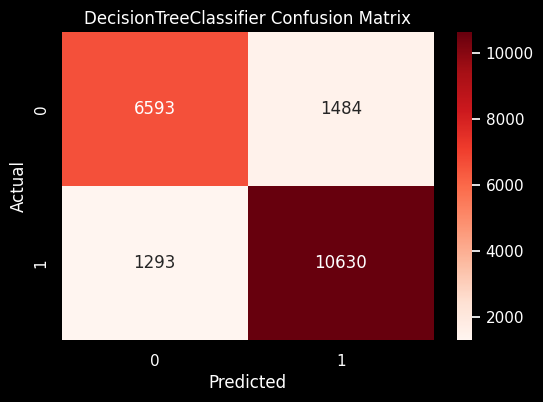


RandomForestClassifier Validation Accuracy: 0.9202

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000



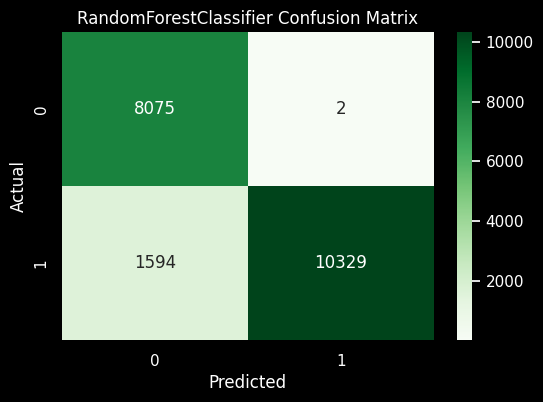


XGBoostClassifier Validation Accuracy: 0.9183

XGBoostClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      8077
           1       0.99      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000



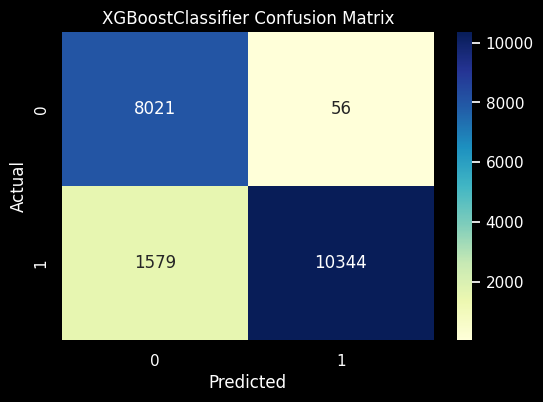

In [9]:
# DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_val_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_val_pred)
dt_class_report = classification_report(y_test, dt_val_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_val_pred)
print("\nDecisionTreeClassifier Validation Accuracy: {:.4f}".format(dt_accuracy))
print("\nDecisionTreeClassifier Classification Report:\n", dt_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_val_pred)
rf_class_report = classification_report(y_test, rf_val_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_val_pred)
print("\nRandomForestClassifier Validation Accuracy: {:.4f}".format(rf_accuracy))
print("\nRandomForestClassifier Classification Report:\n", rf_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('RandomForestClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_val_pred = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_val_pred)
    xgb_class_report = classification_report(y_test, xgb_val_pred)
    xgb_conf_matrix = confusion_matrix(y_test, xgb_val_pred)
    print("\nXGBoostClassifier Validation Accuracy: {:.4f}".format(xgb_accuracy))
    print("\nXGBoostClassifier Classification Report:\n", xgb_class_report)
    plt.figure(figsize=(6,4))
    sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('XGBoostClassifier Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
except ImportError:
    print("XGBoost is not installed.")

# Deep Learning Model <a name="deep-learning-model"></a>

2025-09-21 20:19:48.589162: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 128 (512.00 B)

diagnosed_diabetes
1    48075
0    31925
Name: count, dtype: int64
diagnosed_diabetes
1    60.09375
0    39.90625
Name: proportion, dtype: float64


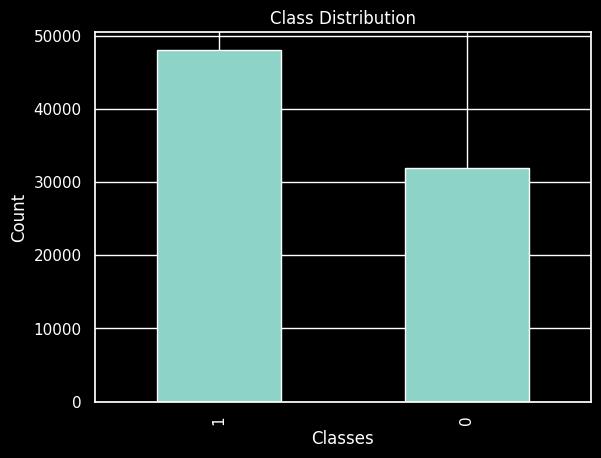

Class weights: {0: 1.2529365700861395, 1: 0.8320332813312532}
Class Weights: {0: 1.2529365700861395, 1: 0.8320332813312532}
Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7895 - accuracy: 0.7163 - loss: 0.5512 - val_AUC: 0.9060 - val_accuracy: 0.8346 - val_loss: 0.3803
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8911 - accuracy: 0.8174 - loss: 0.4081 - val_AUC: 0.9102 - val_accuracy: 0.8371 - val_loss: 0.3663
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8977 - accuracy: 0.8228 - loss: 0.3891 - val_AUC: 0.9113 - val_accuracy: 0.8317 - val_loss: 0.3681
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9000 - accuracy: 0.8242 - loss: 0.3819 - val_AUC: 0.9118 - val_accuracy: 0.8321 - val_loss: 0.3658
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9009 - accuracy: 0.8238 - loss: 0.3801 - val_AUC: 0.9125 - val_accuracy: 0.8340 - val_loss: 0.3611
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC:

In [10]:
# Building Deep Learning model (layers)
input_dl = X_train.shape[1]
model = keras.Sequential([
    layers.Input(shape=(input_dl,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='AUC')]
)
model.summary()

# Number of samples for each class
print(pd.Series(y_train).value_counts())

# Percentage of each class
print(pd.Series(y_train).value_counts(normalize=True) * 100)

pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

# Get class weights
def get_class_weights(y):
    classes = np.unique(y)
    class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
    class_weight_dict = dict(zip(classes, class_weights))
    print("Class weights:", class_weight_dict)
    return class_weight_dict

weights = get_class_weights(y_train)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate on the Test Set <a name="evaluate-on-the-test"></a>

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9346 - accuracy: 0.8688 - loss: 0.2994
Test Accuracy: 0.8750
Test AUC: 0.9399


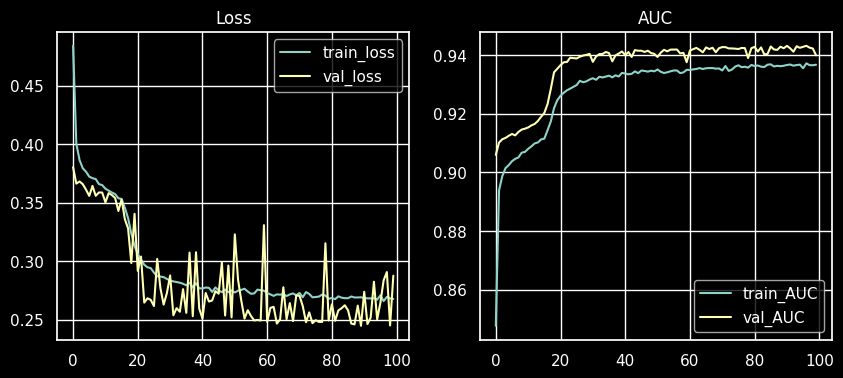

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test ROC AUC: 0.9399308089646379

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      8077
           1       0.91      0.88      0.89     11923

    accuracy                           0.88     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.88      0.88      0.88     20000



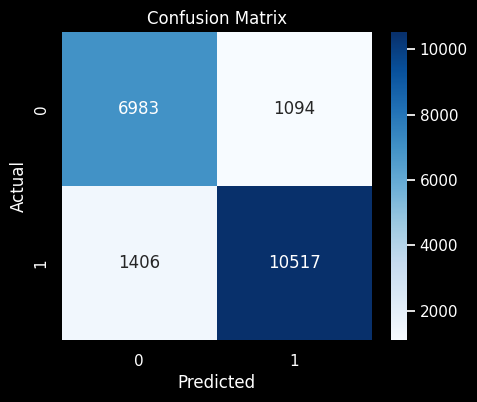

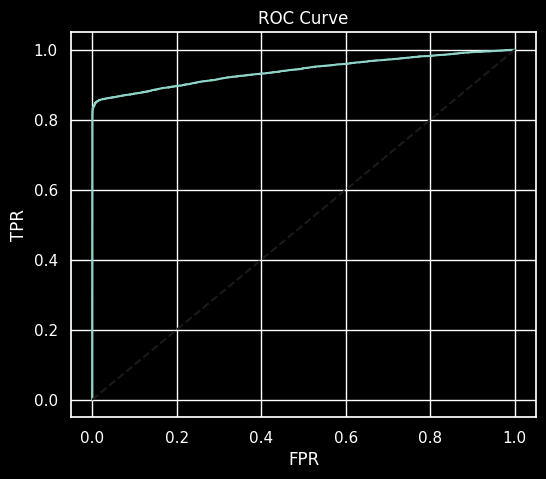

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
   Sample_ID  Predicted_Probability  Predicted_Class
0          1               0.001335                0
1          2               0.003775                0
2          3               0.002392                0
3          4               0.000682                0
4          5               0.002516                0
5          6               0.003897                0
6          7               0.001769                0
7          8               0.007844                0
8          9               0.000497                0
9         10               0.002765                0


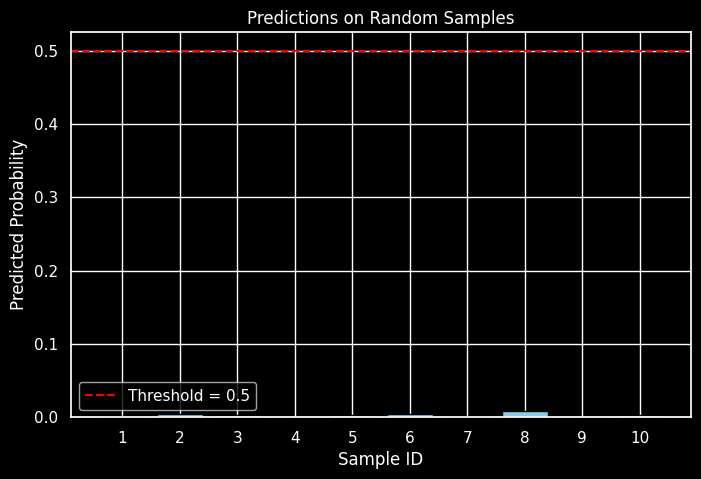

In [11]:
# Evaluate for new data
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['AUC'], label='train_AUC')
plt.plot(history.history['val_AUC'], label='val_AUC')
plt.title('AUC')
plt.legend()
plt.show()

# Evaluate on the test set
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_prob))
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# Random samples prediction
n_features = X_train.shape[1]
random_samples = np.random.rand(10, n_features)
preds = model.predict(random_samples).flatten()
classes = (preds > 0.5).astype(int)
df_results = pd.DataFrame({
    "Sample_ID": range(1, 11),
    "Predicted_Probability": preds,
    "Predicted_Class": classes
})
print(df_results)
plt.figure(figsize=(8,5))
plt.bar(df_results["Sample_ID"], df_results["Predicted_Probability"], color="skyblue", edgecolor="black")
plt.axhline(0.5, color="red", linestyle="--", label="Threshold = 0.5")
plt.xticks(df_results["Sample_ID"])
plt.xlabel("Sample ID")
plt.ylabel("Predicted Probability")
plt.title("Predictions on Random Samples")
plt.legend()
plt.show()